In [1]:
from gensim.models import LdaModel
import pickle as pkl
import numpy as np
import matplotlib.colors as mcolors
from nltk.corpus import stopwords
from wordcloud import WordCloud #, STOPWORDS
from matplotlib import pyplot as plt
# import matplotlib.colors as mcolors
# from tqdm.notebook import tqdm
# import pandas as pd
# import matplotlib.pyplot as plt

In [2]:
# Optimal number of topics
nTopics = 17

# Load Data

In [3]:
# Load model
lda_model = LdaModel.load(f'trained_models/trained_lda_model_{nTopics}')

In [4]:
# Load topic distributions
topic_distributions = np.load(f'data/topic_distributions_{lda_model.num_topics}.npy')

In [5]:
# Define colors to associate with each topic
def clamp(x): 
    return max(0, min(x, 255))

cols = [color for name, color in mcolors.XKCD_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),  
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),  
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),  
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),  
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)] 

for i in range(lda_model.num_topics):
#     fig = plt.figure(figsize=(6,3), dpi=80, facecolor='w', edgecolor='k')
    r, g, b = tableau20[i]  
    cols[i] = "#{0:02x}{1:02x}{2:02x}".format(clamp(r), clamp(g), clamp(b))

In [6]:
# load raw corpus dataframe
with open('data/raw_corpus.pkl', 'rb') as f:
    corpus_df = pkl.load(f)
    
# # load cleaned corpus
# with open('data/cleaned_corpus.pkl', 'rb') as f:
#     corpus = pkl.load(f)

# Create WordClouds

In [7]:
#Wordcloud of top N words in each topic
stop_words = stopwords.words('english')
cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=3500,
                  height=3500,
                  max_words=15,
                  colormap='tab20',
                  color_func=lambda *args, **kwargs: tableau20[i],
                  prefer_horizontal=1.0)


In [8]:
topics = lda_model.show_topics(formatted=False, num_topics=nTopics, num_words=20)
topics

[(0,
  [('soil', 0.124761984),
   ('water', 0.06047712),
   ('content', 0.031006658),
   ('infiltration', 0.029791633),
   ('property', 0.013157732),
   ('value', 0.010805278),
   ('measure', 0.0102695795),
   ('retention', 0.008405907),
   ('depth', 0.008237669),
   ('parameter', 0.0073170927),
   ('relationship', 0.0072792317),
   ('curve', 0.0071576224),
   ('alpha', 0.007041525),
   ('theta', 0.0068429443),
   ('profile', 0.006789215),
   ('hydraulic', 0.0066818562),
   ('different', 0.006545057),
   ('field', 0.005844431),
   ('landslide', 0.0057571135),
   ('rate', 0.0056200204)]),
 (1,
  [('model', 0.06908284),
   ('datum', 0.02345004),
   ('parameter', 0.014346704),
   ('base', 0.014144984),
   ('use', 0.01200817),
   ('approach', 0.011303724),
   ('uncertainty', 0.01014363),
   ('simulation', 0.008220719),
   ('performance', 0.007622477),
   ('error', 0.0075085317),
   ('hydrological', 0.007317043),
   ('prediction', 0.006754069),
   ('different', 0.005906356),
   ('apply', 0.

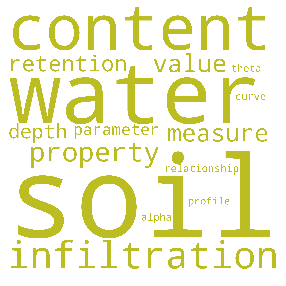

<Figure size 432x288 with 0 Axes>

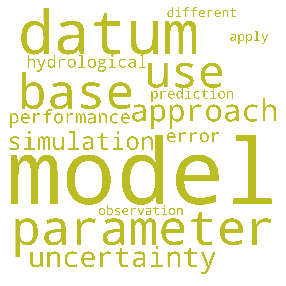

<Figure size 432x288 with 0 Axes>

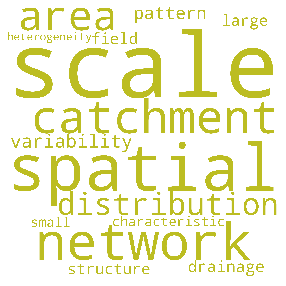

<Figure size 432x288 with 0 Axes>

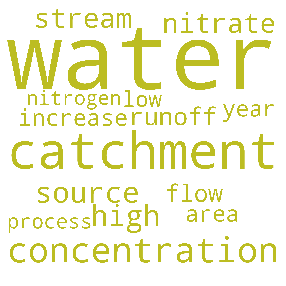

<Figure size 432x288 with 0 Axes>

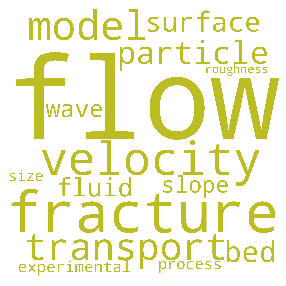

<Figure size 432x288 with 0 Axes>

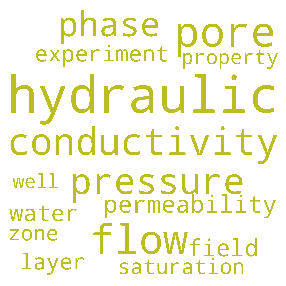

<Figure size 432x288 with 0 Axes>

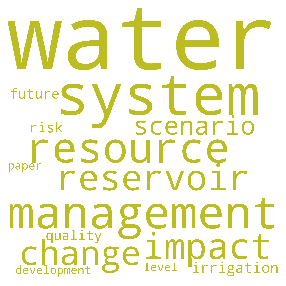

<Figure size 432x288 with 0 Axes>

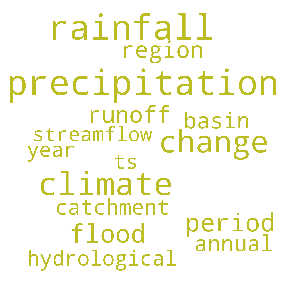

<Figure size 432x288 with 0 Axes>

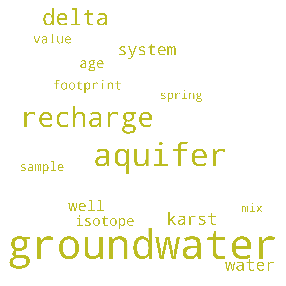

<Figure size 432x288 with 0 Axes>

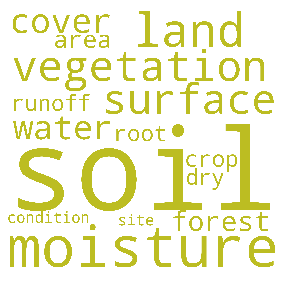

<Figure size 432x288 with 0 Axes>

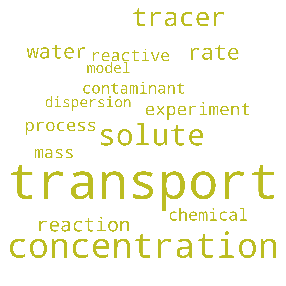

<Figure size 432x288 with 0 Axes>

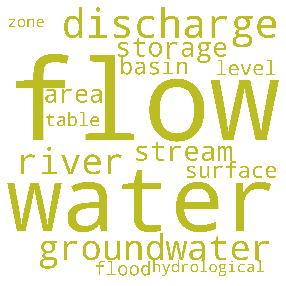

<Figure size 432x288 with 0 Axes>

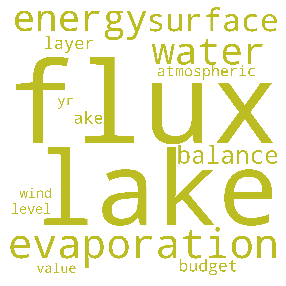

<Figure size 432x288 with 0 Axes>

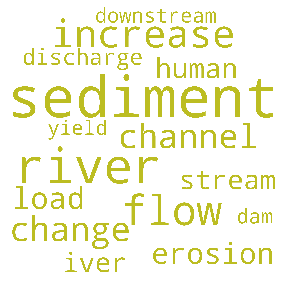

<Figure size 432x288 with 0 Axes>

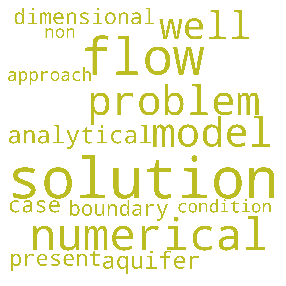

<Figure size 432x288 with 0 Axes>

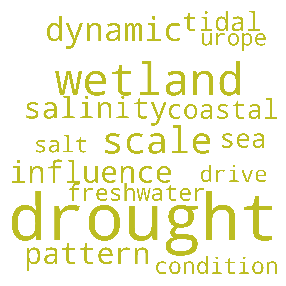

<Figure size 432x288 with 0 Axes>

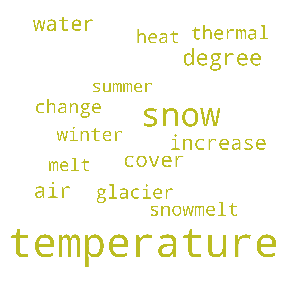

<Figure size 432x288 with 0 Axes>

In [9]:
# Plot wordclouds
for t in range(lda_model.num_topics):
    fig, ax = plt.subplots(figsize=(5, 5))
    topic_words = dict(topics[t][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=1500)
    ax.imshow(cloud)
    ax.axis('off')
    plt.show()
    plt.savefig(f'figures/word_clouds_{t}.png')

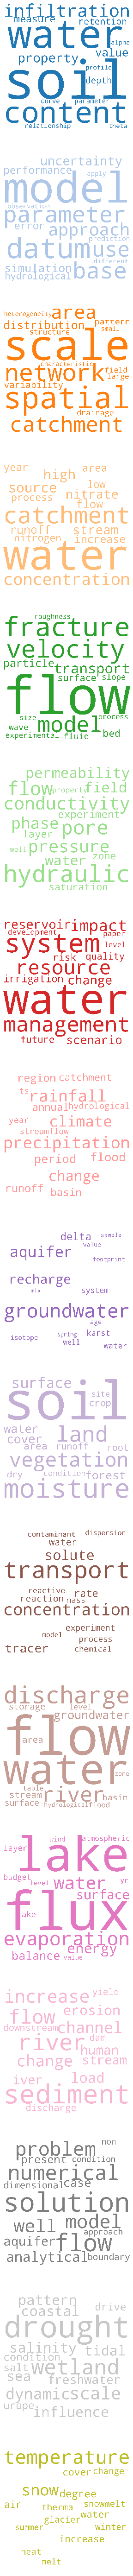

In [10]:
# Plot wordclouds

# init figure
fig, axes = plt.subplots(nTopics, 1, figsize=(5, 6*nTopics))

# subplots for wordclouds from each topic
for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=1500)
    plt.gca().imshow(cloud)
    plt.gca().axis('off')

# # remove as much whitespace as possible
# plt.subplots_adjust(wspace=0, hspace=0)
# plt.axis('off')
# plt.margins(x=0, y=0)
# plt.tight_layout()
# plt.show()

# save figure
plt.savefig('figures/word_clouds_{topic}.png')

# Time Series Plots

In [ ]:
# Create time series

# all years where we have data
years = np.unique(corpus_df['Year'])

# init storage (as a dictionary)
topic_popularity = np.zeros([len(years), lda_model.num_topics])

# loop through years
y = -1
for year in years:
    y = y+1
    
    # extract all papers in this year
    hm_year = hm[corpus_df['Year'] == year,:]

    # calculate topic popularity for this year
    topic_popularity[y,:] = np.sum(hm_year, axis=0) / np.sum(hm_year)

In [ ]:
# define plotting colors

tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),  
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),  
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),  
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),  
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)] 
# colorz=[color for name, color in mcolors.TABLEAU_COLORS.items()]

# define topic names
labels = ['Precipitation Extremes & Distributions',
          'Climate Change',
          'River Networks, Topography, & Scaling',
          'Hydrogeology',
          'Forecasting',
          'Energy Balance (Hydrometeorology, Land Surface)',
          'Snow and Ice',
          'Sediment & Erosion',
          'Water Resources Management',
          'Hydrogeomorphology',
          'Uncertainty and Calibration',
          'Statistical Hydrology',
          'Quality & Transport',
          'Miscellaneous',
          'Soil Moisture',
          'Floods and Discharge',
          'Precipitation Trends & Climatology']

In [ ]:
# plot individual time series

# plot individual time series
for i in range(lda_model.num_topics):
    fig = plt.figure(figsize=(6,3), dpi=80, facecolor='w', edgecolor='k')
    r, g, b = tableau20[i]  
    pltcolor = (r / 255., g / 255., b / 255.)
    plt.plot(years, popularity_all_journals[:,i], color = pltcolor, linewidth=8, label=labels[i])
    ymax = np.max(popularity_all_journals[1:,i])
    ymin = np.min(popularity_all_journals[1:,i])
    plt.xlim([1,29])
    plt.ylim([ymin-0.05*(ymax-ymin), ymax+0.05*(ymax-ymin)])
    plt.title(f'{labels[i]}', fontsize=20)
    plt.xticks(years[5::5], fontsize=14)
    plt.yticks(fontsize=14)
#     plt.xlabel('Year of Publication', fontsize=20)
    plt.ylabel('Popularity', fontsize=20)
    plt.grid()
#     plt.savefig(f'figures/individual_topic_{i}.png')
    plt.show()

In [ ]:
# plot relative time series
fig = plt.figure(figsize=(10, 5), dpi=80, facecolor='w', edgecolor='k')
for i in range(lda_model.num_topics):
    r, g, b = tableau20[i]  
    pltcolor = (r / 255., g / 255., b / 255.)
    plt.plot(years, popularity_all_journals[:,i], 
             color = pltcolor, linewidth=3, label=labels[i])
plt.xlim([1,47])
plt.xticks(years[5::5], fontsize=14)
plt.yticks(fontsize=14)
# plt.xlabel('Year of Publication', fontsize=20)
plt.legend()
plt.ylabel('Popularity', fontsize=20)
plt.title('Relative Popularity of Topics', fontsize=28)
plt.grid()
# plt.savefig(f'figures/all_topics_timeseries_{i}.png')
plt.show()